In [1]:
# Import required module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_patient = pd.read_csv('IndividualDetails.csv', index_col=0)

display(df_patient)

,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
id,,,,,,,,,,,
0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."
...,...,...,...,...,...,...,...,...,...,...,...
3666,NaN,04/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,NaN
3667,NaN,04/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,NaN
3668,NaN,04/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,NaN


In [3]:
df_patient.describe(include='all')

,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
count,817,3671,805,1035,822,2744,3671,427,3671,3570,2640
unique,812,37,81,2,234,261,30,10,4,34,615
top,KL-TS-P1,03/04/2020,35,M,Mumbai,Mumbai,Maharashtra,India,Hospitalized,03/04/2020,Details awaited
freq,2,563,28,782,67,247,635,368,3557,577,700


In [4]:
df_patient.dtypes

government_id         object
diagnosed_date        object
age                   object
gender                object
detected_city         object
detected_district     object
detected_state        object
nationality           object
current_status        object
status_change_date    object
notes                 object
dtype: object

In [5]:
df_patient.isnull().sum()

government_id         2854
diagnosed_date           0
age                   2866
gender                2636
detected_city         2849
detected_district      927
detected_state           0
nationality           3244
current_status           0
status_change_date     101
notes                 1031
dtype: int64

In [6]:
df_patient['current_status'].value_counts().to_dict()

{'Hospitalized': 3557, 'Recovered': 89, 'Deceased': 24, 'Migrated': 1}

In [7]:
df_patient = df_patient[[
    'diagnosed_date',
    'age',
    'gender',
    'current_status'
]]

df_patient['diagnosed_date'] = pd.to_datetime(df_patient['diagnosed_date'], dayfirst=True)

# Change age range (ex: 10-20) into median value
for data in df_patient['age'].unique().astype(str):
    if data.find('-') != -1:
        temp = data.split('-')
        if int(temp[1])-int(temp[0]) < 15:
            median = ( int(temp[1])+int(temp[0]) ) / 2
            df_patient.age = df_patient.age.replace({data:median})
        else:
            df_patient.age = df_patient.age.replace({data:np.nan})

df_patient['age'] = df_patient['age'].astype(float)
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
df_patient['age_group'] = pd.cut(df_patient['age'], bins=bins, labels=labels, right=False)

display(df_patient)
df_patient.describe(include='all')

,diagnosed_date,age,gender,current_status,age_group
id,,,,,
0,2020-01-30,20.0,F,Recovered,20-29
1,2020-02-02,NaN,NaN,Recovered,NaN
2,2020-02-03,NaN,NaN,Recovered,NaN
3,2020-03-02,45.0,M,Recovered,40-49
4,2020-03-02,24.0,M,Recovered,20-29
...,...,...,...,...,...
3666,2020-04-04,NaN,NaN,Hospitalized,NaN
3667,2020-04-04,NaN,NaN,Hospitalized,NaN
3668,2020-04-04,NaN,NaN,Hospitalized,NaN


,diagnosed_date,age,gender,current_status,age_group
count,3671,805.000000,1035,3671,805
unique,37,NaN,2,4,10
top,2020-04-04 00:00:00,NaN,M,Hospitalized,20-29
freq,563,NaN,782,3557,180
first,2020-01-30 00:00:00,NaN,NaN,NaN,NaN
last,2020-04-04 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,40.777640,NaN,NaN,NaN
std,NaN,16.944165,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN


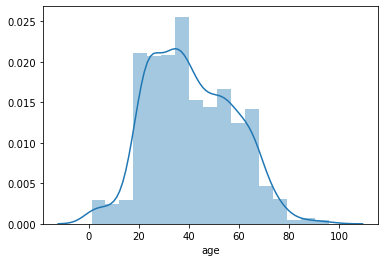

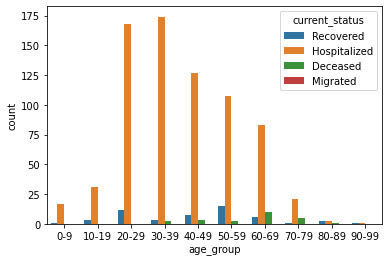

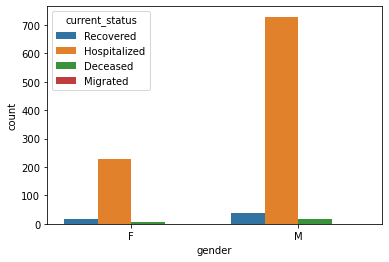

In [8]:
sns.distplot(df_patient['age'])
plt.show()

sns.countplot(x='age_group', hue='current_status', data=df_patient)
plt.show()

sns.countplot(x='gender', hue='current_status', data=df_patient)
plt.show()


In [9]:
all_age = df_patient.groupby(['age_group']).size().reset_index(name='all')
Deceased_age = df_patient[df_patient['current_status']=='Deceased'].groupby(['age_group']).size().reset_index(name='Deceased')
Recovered_age = df_patient[df_patient['current_status']=='Recovered'].groupby(['age_group']).size().reset_index(name='Recovered')

mortality_age = all_age.merge(Deceased_age)
mortality_age = mortality_age.merge(Recovered_age)
mortality_age['mortality_rate'] = mortality_age['Deceased']/mortality_age['all']
display(mortality_age)


all_gender = df_patient.groupby(['gender']).size().reset_index(name='all')
Deceased_gender = df_patient[df_patient['current_status']=='Deceased'].groupby(['gender']).size().reset_index(name='Deceased')
Recovered_gender = df_patient[df_patient['current_status']=='Recovered'].groupby(['gender']).size().reset_index(name='Recovered')

mortality_gender = all_gender.merge(Deceased_gender)
mortality_gender = mortality_gender.merge(Recovered_gender)
mortality_gender['mortality_rate'] = mortality_gender['Deceased']/mortality_gender['all']
display(mortality_gender)

,age_group,all,Deceased,Recovered,mortality_rate
0,0-9,18,0,1,0.000000
1,10-19,34,0,3,0.000000
2,20-29,180,0,12,0.000000
3,30-39,179,2,3,0.011173
4,40-49,137,3,7,0.021898
5,50-59,124,2,15,0.016129
6,60-69,99,10,6,0.101010
7,70-79,27,5,1,0.185185
8,80-89,5,1,2,0.200000
9,90-99,2,0,1,0.000000


,gender,all,Deceased,Recovered,mortality_rate
0,F,253,7,18,0.027668
1,M,782,16,37,0.020460


C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


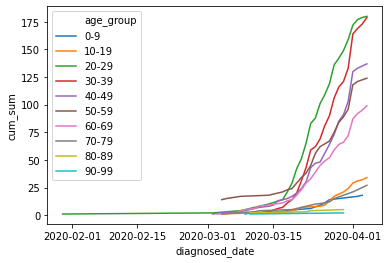

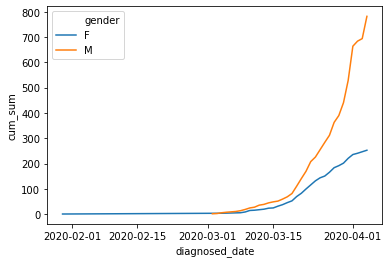

In [10]:
time_age = df_patient.groupby(['diagnosed_date','age_group']).size().reset_index(name='count')
time_age['cum_sum'] = time_age.groupby(['age_group'])['count'].cumsum()
time_age['cum_perc'] = 100*time_age['cum_sum']/time_age['count'].sum()
sns.lineplot(x='diagnosed_date',y='cum_sum',hue_order=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'],hue='age_group',data=time_age)
plt.show()

time_sex = df_patient.groupby(['diagnosed_date','gender']).size().reset_index(name='count')
time_sex['cum_sum'] = time_sex.groupby(['gender'])['count'].cumsum()
time_sex['cum_perc'] = 100*time_sex['cum_sum']/time_sex['count'].sum()
sns.lineplot(x='diagnosed_date',y='cum_sum',hue='gender',data=time_sex)
plt.show()

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

for age_group in time_age['age_group'].unique():
    print(age_group)
    df_log = time_age.loc[time_age['age_group']==age_group]

    if len(df_log) > 2:
        FMT = '%Y-%m-%d %H:%M:%S'
        date = df_log['diagnosed_date']
        df_log['diagnosed_date'] = date.map(lambda x : (x - datetime.strptime("2020-01-01 00:00:00", FMT)).days)

        # display(df_log)

        def logistic_model(x,a,b,c):
            return c/(1+np.exp(-(x-b)/a))

        x = list(df_log['diagnosed_date'])
        y = list(df_log['cum_sum'])

        p0 = np.random.exponential(size=3)

        bounds = (0, [100000.,3.,1000000000.])

        fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])
        # fit = curve_fit(logistic_model,x,y,bounds=bounds,p0=p0)

        print('fit: ')
        print(fit)
        a = fit[0][0]
        b = fit[0][1]
        c = fit[0][2]

        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        print('errors')
        print(errors)

        sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
        print('sol')
        print(sol)

        pred_x = list(range(max(x),sol))
        plt.rcParams['figure.figsize'] = [7, 7]
        plt.rc('font', size=14)
        # Real data
        # plt.scatter(x,y,label="Real data",color="red")
        # Predicted logistic curve
        plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label=age_group)
        # Predicted exponential curve
        # plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
        plt.legend()
        plt.xlabel("Days since 1 January 2020")
        plt.ylabel("Total number of infected people")
        # plt.ylim((min(y)*0.9,c*1.1))
        
        y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]
        mean_squared_error(y,y_pred_logistic)
plt.show()
# def exponential_model(x,a,b,c):
#     return a*np.exp(b*(x-c))
# exp_fit = curve_fit(exponential_model,x,y,p0=[1,1,1])

20-29
fit: 
(array([  3.73012737,  83.81573896, 192.52764882]), array([[ 0.02549056,  0.02656055,  0.51268389],
       [ 0.02656055,  0.05213568,  0.81881102],
       [ 0.51268389,  0.81881102, 15.66780907]]))
errors
[0.15965762845995787, 0.22833238800172817, 3.9582583375388323]
sol
105
40-49
fit: 
(array([  5.05786748,  89.79541277, 208.23041706]), array([[1.19182299e-01, 3.36316769e-01, 6.29686367e+00],
       [3.36316769e-01, 1.13152715e+00, 2.14838699e+01],
       [6.29686367e+00, 2.14838699e+01, 4.15924886e+02]]))
errors
[0.3452278948769349, 1.063732647571499, 20.394236589338217]
sol
124
60-69
fit: 
(array([  5.6049241 ,  88.84428805, 139.76631433]), array([[  0.12712543,   0.31982503,   3.55066314],
       [  0.31982503,   0.93985287,  10.46793516],
       [  3.55066314,  10.46793516, 118.5760726 ]]))
errors
[0.3565465380696607, 0.96946008973771, 10.88926409823228]
sol
117
10-19
C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:16: Sett

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

F
C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,diagnosed_date,gender,count,cum_sum,cum_perc
0,29,F,1,1,0.096618
3,63,F,3,4,0.386473
7,67,F,2,6,0.579710
9,68,F,3,9,0.869565
11,69,F,6,15,1.449275
13,70,F,1,16,1.545894
15,71,F,2,18,1.739130
17,72,F,2,20,1.932367
19,73,F,4,24,2.318841
21,74,F,1,25,2.415459


fit: 
(array([  4.634149  ,  84.11426564, 282.68377839]), array([[1.76354416e-02, 2.56652141e-02, 5.92363375e-01],
       [2.56652141e-02, 5.70026817e-02, 1.20257280e+00],
       [5.92363375e-01, 1.20257280e+00, 2.81440060e+01]]))
errors
[0.13279849994380827, 0.23875234390972783, 5.305092461512224]
sol
112
M
C:\Users\marfa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,diagnosed_date,gender,count,cum_sum,cum_perc
1,61,M,2,2,0.193237
2,62,M,1,3,0.289855
4,63,M,3,6,0.579710
5,64,M,2,8,0.772947
6,66,M,3,11,1.062802
8,67,M,3,14,1.352657
10,68,M,5,19,1.835749
12,69,M,6,25,2.415459
14,70,M,3,28,2.705314
16,71,M,8,36,3.478261


fit: 
(array([   5.75601796,   93.37832673, 1496.23701618]), array([[1.16018584e-01, 4.83194095e-01, 6.51330196e+01],
       [4.83194095e-01, 2.26212843e+00, 3.10883623e+02],
       [6.51330196e+01, 3.10883623e+02, 4.31010800e+04]]))
errors
[0.340615008818982, 1.5040373759270695, 207.607995925581]
sol
143


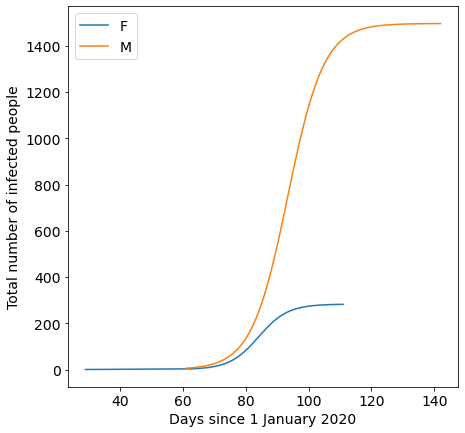

In [14]:
for gender in time_sex['gender'].unique():
    print(gender)
    df_log = time_sex.loc[time_sex['gender']==gender]

    if len(df_log) > 2:
        FMT = '%Y-%m-%d %H:%M:%S'
        date = df_log['diagnosed_date']
        df_log['diagnosed_date'] = date.map(lambda x : (x - datetime.strptime("2020-01-01 00:00:00", FMT)).days)

        display(df_log)

        def logistic_model(x,a,b,c):
            return c/(1+np.exp(-(x-b)/a))

        x = list(df_log['diagnosed_date'])
        y = list(df_log['cum_sum'])

        p0 = np.random.exponential(size=3)

        bounds = (0, [100000.,3.,1000000000.])

        fit = curve_fit(logistic_model,x,y,p0=[2,100,20000])
        # fit = curve_fit(logistic_model,x,y,bounds=bounds,p0=p0)

        print('fit: ')
        print(fit)
        a = fit[0][0]
        b = fit[0][1]
        c = fit[0][2]

        errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
        print('errors')
        print(errors)

        sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
        print('sol')
        print(sol)

        pred_x = list(range(max(x),sol))
        plt.rcParams['figure.figsize'] = [7, 7]
        plt.rc('font', size=14)
        # Real data
        # plt.scatter(x,y,label="Real data",color="red")
        # Predicted logistic curve
        plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label=gender)
        # Predicted exponential curve
        # plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Exponential model" )
        plt.legend()
        plt.xlabel("Days since 1 January 2020")
        plt.ylabel("Total number of infected people")
        # plt.ylim((min(y)*0.9,c*1.1))
        
        y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]
        mean_squared_error(y,y_pred_logistic)
plt.show()